# <center><font color=red> **ANALYSE MULTIVARIEE**

## <center><font color=yellow> **1. RELATION ENTRE VARIABLES QUANTITATIVES**

In [92]:
 # Code optionnel 
from warnings import filterwarnings
filterwarnings('ignore')

## Importation des données 

In [95]:
# importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go 
from plotly.figure_factory import create_table
import plotly.express as px
import scipy.stats as st
from scipy import stats
from PyPDF2 import PdfMerger 

In [97]:
# importation de données
file = 'nhanes_2015_2016.csv'
df = pd.read_csv(file)
df.head(7)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN


In [101]:
# Réétiquetage de la variable

df['DMDMARTL'] = df.DMDMARTL.replace({1.0 : "Married",
                                      2.0 : "Widowed",
                                      3.0 : "Divorced",
                                      4.0 : "Separated",
                                      5.0 : "Never married",
                                      6.0 : "Living with partener",
                                      77.0 : "Refused",
                                      99.0 : "Dont't Know",
                                      np.nan : "Missing"
                                     })

df["RIAGENDR"] = df["RIAGENDR"].replace({1 : "Male", 2:"Female"})

df["DMDEDUC2"] = df["DMDEDUC2"].replace({1 : "<9",
                                         2 : "9 - 11",
                                         3 : "HS/GED",
                                         4 : "some college/AA", 
                                         5 :'college', 
                                         7: "Refused",
                                         9:"Don't Know", 
                                         np.nan : "Missing"})
    



In [103]:
df.head(7)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,Male,62,3,1.0,college,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,Male,53,3,2.0,HS/GED,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,Male,78,3,1.0,HS/GED,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,Female,56,3,1.0,college,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,Female,42,4,1.0,some college/AA,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,Female,72,1,2.0,9 - 11,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,Male,22,4,1.0,some college/AA,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   object 
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5735 non-null   object 
 10  DMDMARTL  5735 non-null   object 
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [107]:
df.isnull().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2       0
DMDMARTL       0
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

## Gestion des valeurs manquantes

In [110]:
df.isnull().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2       0
DMDMARTL       0
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

In [112]:
# remplacer les colonnes manquantes par la valeur moyenne, se rassurer que les colonnes sont du type numeric

df.fillna(df.select_dtypes(include='number').mean(),inplace = True)


In [114]:
df.isnull().sum()

SEQN        0
ALQ101      0
ALQ110      0
ALQ130      0
SMQ020      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
WTINT2YR    0
SDMVPSU     0
SDMVSTRA    0
INDFMPIR    0
BPXSY1      0
BPXDI1      0
BPXSY2      0
BPXDI2      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
HIQ210      0
dtype: int64

## <center><font color=red> **1. Nuage de points et Coefficient de corrélation de Pearson**

le nuage de point est un graphique qui permet de comprendre la rélation existatnte entre 2 variables Quantitatives

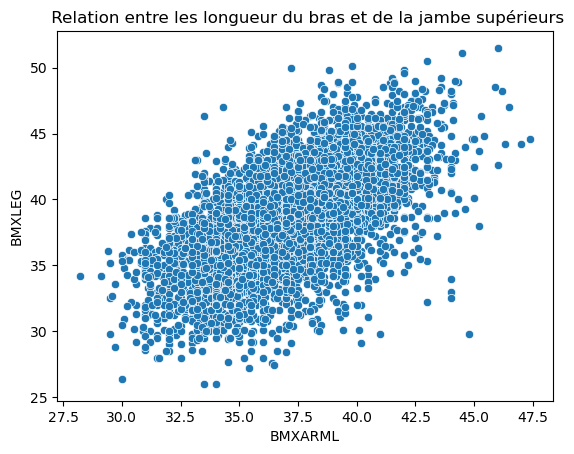

In [118]:
# Relation entre la Variable 'BMXARML' et 'BMXLEG"   Il y a une correlation positive // scatterplot = nuage de point
sns.scatterplot(x="BMXARML" , y = 'BMXLEG' , data = df )
plt.title(" Relation entre les longueur du bras et de la jambe supérieurs")
plt.show()

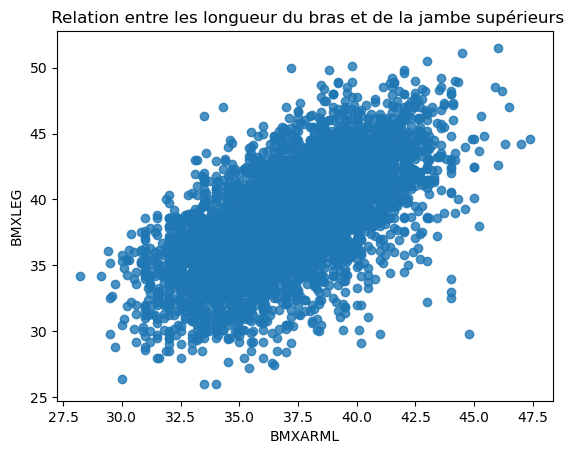

In [119]:
# afficher une droite  de regression entre les deux variables 
sns.regplot(x="BMXARML" , y = 'BMXLEG' ,fit_reg = False, data = df )
plt.title(" Relation entre les longueur du bras et de la jambe supérieurs")
plt.show()

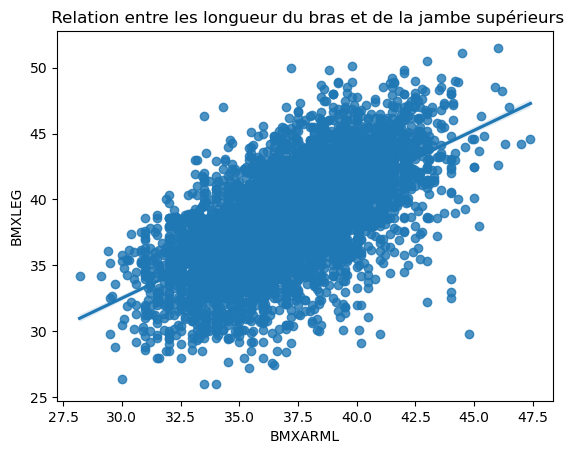

In [121]:
# afficher une droite  de regression entre les deux variables 
sns.regplot(x="BMXARML" , y = 'BMXLEG' ,fit_reg = True, data = df )
plt.title(" Relation entre les longueur du bras et de la jambe supérieurs")
plt.show()

In [123]:
# coefficient de pearson entre les variables // 
# mesure la force de la relation = cov / par le produit 

stats.pearsonr(df["BMXARML"],df['BMXLEG'])


PearsonRResult(statistic=0.6189135459893192, pvalue=0.0)

In [124]:
#Matrice de corrélation 
df_numeric = df.select_dtypes(include=["number"])
correlation_matrix = df_numeric.corr()
correlation_matrix

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIDAGEYR,RIDRETH1,DMDCITZN,DMDHHSIZ,WTINT2YR,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
SEQN,1.000000,-0.006243,-0.001199,0.016129,0.017550,0.001928,0.012015,-0.008717,-0.024727,0.000342,...,0.001021,0.008104,0.009019,0.005283,0.008511,0.012605,0.016361,0.011238,0.000096,-0.007437
ALQ101,-0.006243,1.000000,-0.013033,0.027407,0.215476,0.042113,0.023412,0.079538,0.084429,-0.151487,...,0.010470,-0.058372,-0.097240,-0.260076,0.022606,-0.207747,-0.187107,-0.056968,-0.017780,0.032077
ALQ110,-0.001199,-0.013033,1.000000,-0.023016,0.124127,-0.018147,-0.011008,0.049701,0.035961,-0.027646,...,-0.007421,-0.039930,-0.049105,-0.042809,-0.035779,-0.014118,-0.043280,-0.047377,-0.050183,0.021419
ALQ130,0.016129,0.027407,-0.023016,1.000000,-0.009888,0.002269,0.011711,0.009397,-0.009157,-0.023223,...,-0.014891,-0.001134,0.002234,0.017788,-0.006234,0.027734,0.022111,0.009070,-0.003094,0.004172
SMQ020,0.017550,0.215476,0.124127,-0.009888,1.000000,-0.139940,0.006692,0.075460,0.105990,-0.049887,...,-0.085408,-0.016781,-0.091496,-0.163927,-0.021589,-0.074952,-0.158009,-0.055373,-0.096296,0.014689
RIDAGEYR,0.001928,0.042113,-0.018147,0.002269,-0.139940,1.000000,-0.042209,-0.118094,-0.363930,-0.047806,...,0.435696,-0.052712,-0.010295,-0.143641,0.059100,-0.295919,0.022205,-0.039862,0.213379,0.074520
RIDRETH1,0.012015,0.023412,-0.011008,0.011711,0.006692,-0.042209,1.000000,-0.153300,-0.113354,0.015321,...,-0.000561,0.085353,-0.065064,0.148664,-0.154918,0.199941,0.072997,-0.085727,-0.145164,0.024898
DMDCITZN,-0.008717,0.079538,0.049701,0.009397,0.075460,-0.118094,-0.153300,1.000000,0.179094,-0.166294,...,-0.064584,-0.003307,-0.133232,-0.143693,-0.077376,-0.110959,-0.141509,-0.080207,-0.102249,-0.024595
DMDHHSIZ,-0.024727,0.084429,0.035961,-0.009157,0.105990,-0.363930,-0.113354,0.179094,1.000000,-0.145241,...,-0.156529,0.027527,-0.007203,-0.060750,0.018992,0.010372,-0.086381,0.037355,-0.056577,-0.013677
WTINT2YR,0.000342,-0.151487,-0.027646,-0.023223,-0.049887,-0.047806,0.015321,-0.166294,-0.145241,1.000000,...,-0.084639,0.055217,0.087274,0.205125,-0.005565,0.122310,0.121833,0.029149,0.031821,0.022048


<Axes: >

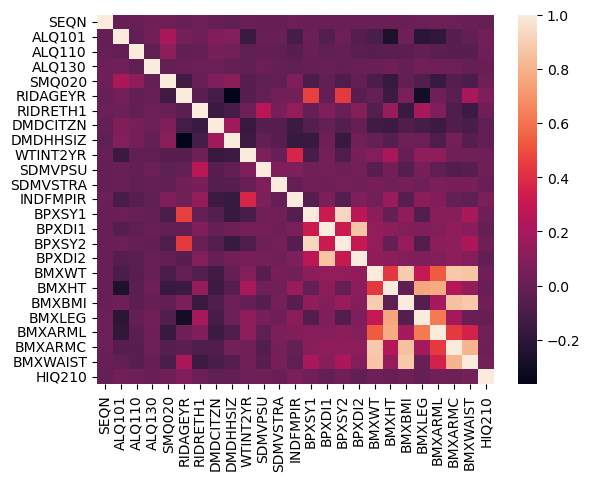

In [125]:
# carte des corrélations
sns.heatmap(correlation_matrix)

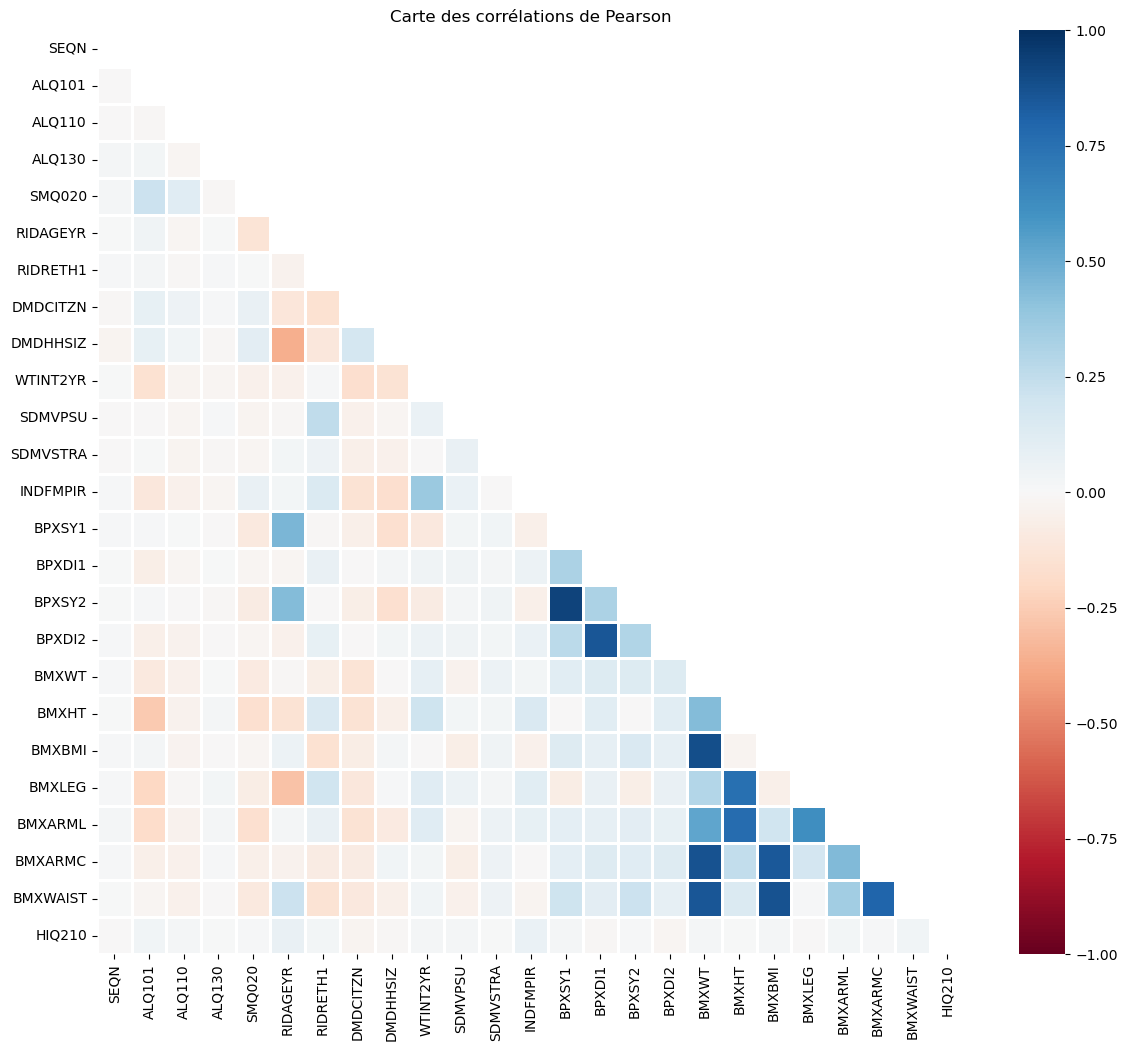

In [126]:
# carte des corrélation ameliorée
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(df_numeric.corr(), dtype=bool))
sns.heatmap(df_numeric.corr(), mask=mask, center=0, cmap='RdBu', 
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1 )


plt.title("Carte des corrélations de Pearson")
plt.show()      

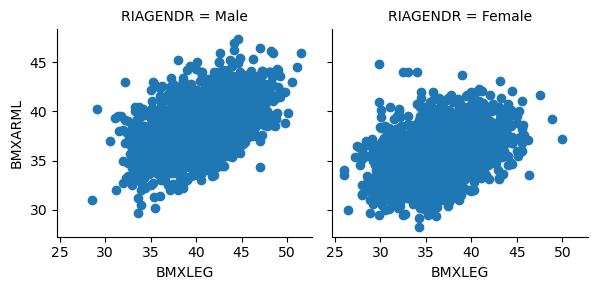

In [129]:
# Relation entre la Variable 'BMXARML' et 'BMXLEG" selon le genre 
sns.FacetGrid(df, col = "RIAGENDR").map(plt.scatter,"BMXLEG", 'BMXARML').add_legend();

In [131]:
# coefficient de pearson entre la Variable 'BMXARML' et 'BMXLEG" selon le genre 
stats.pearsonr(df[df.RIAGENDR == 'Female']['BMXARML'],
              df[df.RIAGENDR  == 'Female']['BMXLEG'])



PearsonRResult(statistic=0.4417207678131515, pvalue=2.2075048806644176e-142)

In [132]:
stats.pearsonr(df[df.RIAGENDR == 'Male']['BMXARML'],
              df[df.RIAGENDR  == 'Male']['BMXLEG'])

PearsonRResult(statistic=0.5104480992874515, pvalue=5.730660445632363e-183)

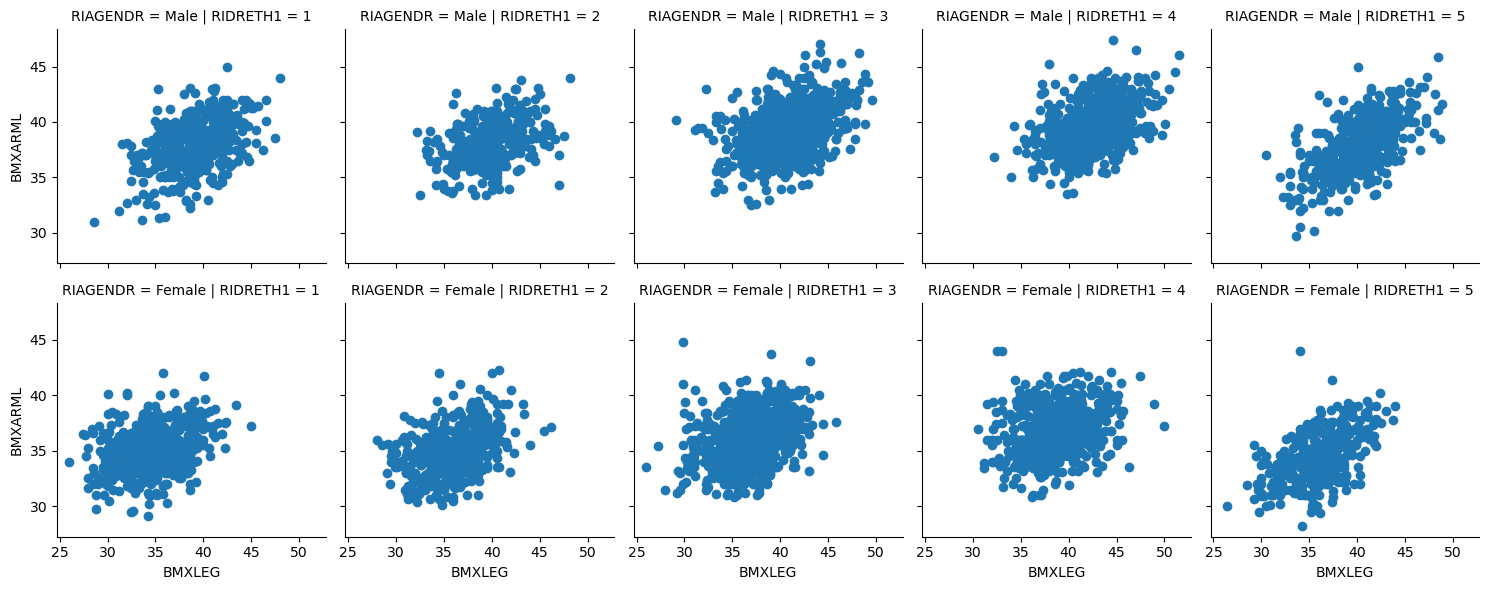

In [134]:
# Relation entre la Variable 'BMXARML' et 'BMXLEG" par sexe et ethnie 
sns.FacetGrid(df, col = "RIDRETH1",row = "RIAGENDR").map(plt.scatter,"BMXLEG", 'BMXARML').add_legend();

# <center> <font color=red> **2.Densité de points 2D**

Utilisé lorsqu'on a un grand volume de données

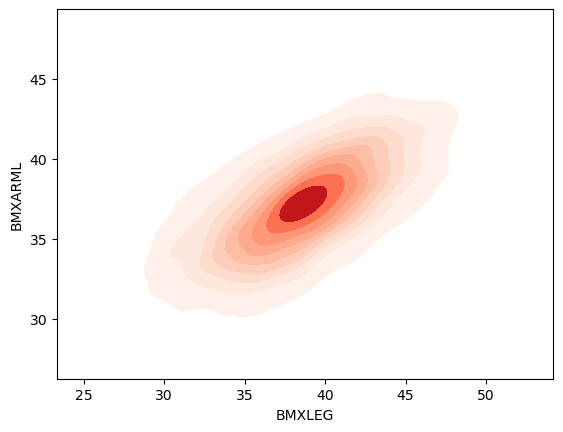

In [138]:
# densité de point 2d entre 2 variables  // desnsité conjointe
sns.kdeplot(x = 'BMXLEG', y = 'BMXARML',cmap = 'Reds',shade = True, data = df);

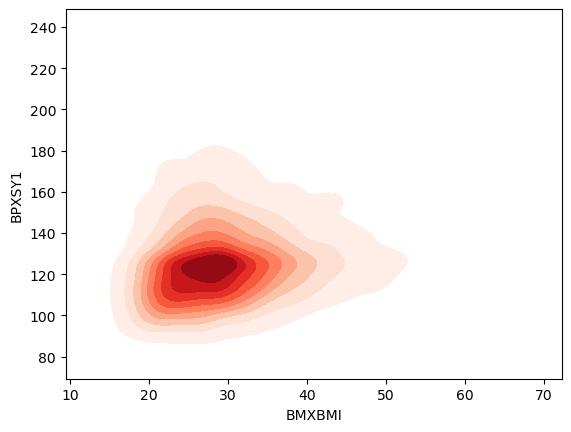

In [139]:
# densité de point 2d entre 2 variables  // desnsité conjointe
sns.kdeplot(x ='BMXBMI', y = 'BPXSY1',cmap = 'Reds',shade = True, data = df);

In [140]:
stats.pearsonr(df['BMXBMI'],df['BPXSY1'])

PearsonRResult(statistic=0.12841332998811406, pvalue=1.6222184362942632e-22)

- Le calcule de coef de pearson repose sur l'hypothèse selon laquelle, les données sont normalement distribuées

  

## <center><font color=yellow> **2. RELATION ENTRE VARIABLES QUALITATIVES : TABLEAU DE CONTINGENCE**

- C'est une methode de representation de données qui consiste à croiser deux caractèristiques d'une population 

# <center> <font color=red> **1.Tableau de contingence**

In [148]:
# effectif du tableau croisé
pd.crosstab(df.DMDEDUC2 ,df.DMDMARTL)

DMDMARTL,Divorced,Living with partener,Married,Missing,Never married,Refused,Separated,Widowed
DMDEDUC2,,,,,,,,
9 - 11,62,80,305,0,117,0,39,40
<9,52,66,341,0,65,0,43,88
Don't Know,1,0,0,0,0,0,0,2
HS/GED,127,133,550,0,237,0,40,99
Missing,0,0,0,261,0,0,0,0
college,120,85,827,0,253,0,22,59
some college/AA,217,163,757,0,332,2,42,108


In [149]:
#fréquence du tableau de contingence , normaliser en ligne
pd.crosstab(df.DMDEDUC2 ,df.DMDMARTL).apply(lambda z: z/z.sum(), axis =1)

DMDMARTL,Divorced,Living with partener,Married,Missing,Never married,Refused,Separated,Widowed
DMDEDUC2,,,,,,,,
9 - 11,0.096423,0.124417,0.474339,0.0,0.181960,0.000000,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.0,0.099237,0.000000,0.065649,0.134351
Don't Know,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.666667
HS/GED,0.107083,0.112142,0.463744,0.0,0.199831,0.000000,0.033727,0.083474
Missing,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
college,0.087848,0.062225,0.605417,0.0,0.185212,0.000000,0.016105,0.043192
some college/AA,0.133868,0.100555,0.466996,0.0,0.204812,0.001234,0.025910,0.066626


In [150]:
#fréquence du tableau de contingence , normaliser en colonne

pd.crosstab(df.DMDEDUC2 ,df.DMDMARTL).apply(lambda z: z/z.sum(), axis =0)

DMDMARTL,Divorced,Living with partener,Married,Missing,Never married,Refused,Separated,Widowed
DMDEDUC2,,,,,,,,
9 - 11,0.107081,0.151803,0.109712,0.0,0.116534,0.0,0.209677,0.101010
<9,0.089810,0.125237,0.122662,0.0,0.064741,0.0,0.231183,0.222222
Don't Know,0.001727,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.005051
HS/GED,0.219344,0.252372,0.197842,0.0,0.236056,0.0,0.215054,0.250000
Missing,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000
college,0.207254,0.161290,0.297482,0.0,0.251992,0.0,0.118280,0.148990
some college/AA,0.374784,0.309298,0.272302,0.0,0.330677,1.0,0.225806,0.272727


In [151]:

# Tableau de contingence entre 2 variables , selon le genre
pd.crosstab([df.RIAGENDR,df.DMDEDUC2] ,df.DMDMARTL).apply(lambda z: z/z.sum(), axis =1)

DMDMARTL                  Divorced  Living with partener   Married  Missing  \
RIAGENDR DMDEDUC2                                                             
Female   9 - 11           0.113402              0.123711  0.412371      0.0   
         <9               0.091691              0.091691  0.424069      0.0   
         Don't Know       0.000000              0.000000  0.000000      0.0   
         HS/GED           0.121784              0.109777  0.413379      0.0   
         Missing          0.000000              0.000000  0.000000      1.0   
         college          0.110181              0.055788  0.577406      0.0   
         some college/AA  0.148515              0.099010  0.418042      0.0   
Male     9 - 11           0.082386              0.125000  0.525568      0.0   
         <9               0.065359              0.111111  0.630719      0.0   
         Don't Know       0.500000              0.000000  0.000000      0.0   
         HS/GED           0.092869              0.114428  0.512438      0.0   
         Missing          0.000000              0.000000  0.000000      1.0   
         college          0.063174              0.069337  0.636364      0.0   
         some college/AA  0.115169              0.102528  0.529494      0.0   

DMDMARTL                  Never married   Refused  Separated   Widowed  
RIAGENDR DMDEDUC2                                                       
Female   9 - 11                0.171821  0.000000   0.075601  0.103093  
         <9                    0.108883  0.000000   0.088825  0.194842  
         Don't Know            0.000000  0.000000   0.000000  1.000000  
         HS/GED                0.188679  0.000000   0.041166  0.125214  
         Missing               0.000000  0.000000   0.000000  0.000000  
         college               0.182706  0.000000   0.016736  0.057183  
         some college/AA       0.210121  0.001100   0.031903  0.091309  
Male     9 - 11                0.190341  0.000000   0.048295  0.028409  
         <9                    0.088235  0.000000   0.039216  0.065359  
         Don't Know            0.000000  0.000000   0.000000  0.500000  
         HS/GED                0.210614  0.000000   0.026534  0.043118  
         Missing               0.000000  0.000000   0.000000  0.000000  
         college               0.187982  0.000000   0.015408  0.027735  
         some college/AA       0.198034  0.001404   0.018258  0.035112

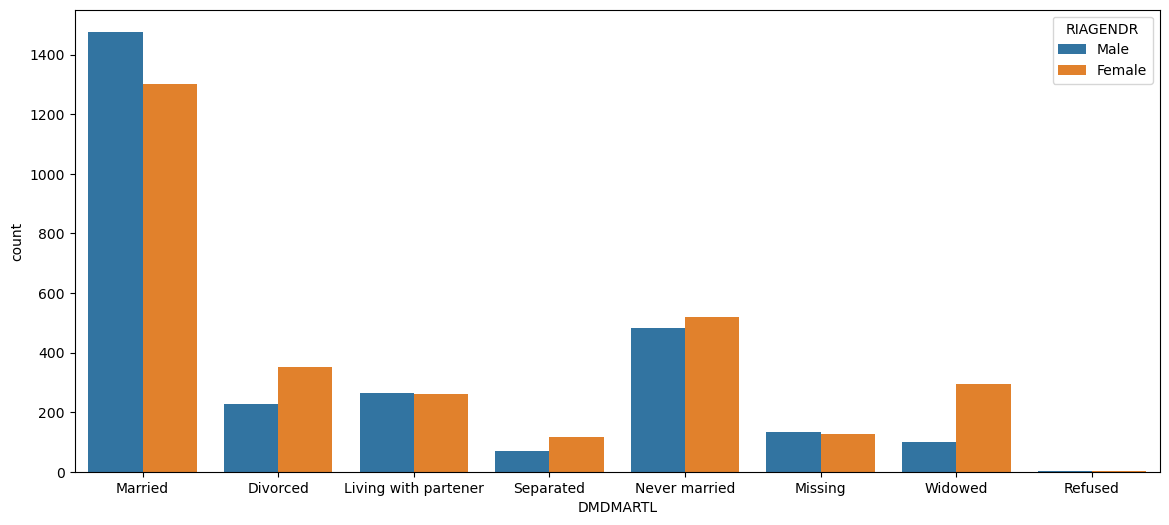

In [152]:
# Diagrammz à barre montrant la situation matrimoniale de deux genres
plt.figure(figsize =(14,6))
sns.countplot(x = "DMDMARTL", hue = "RIAGENDR", data = df);

## <center><font color=yellow> **2. RELATION ENTRE VARIABLES QUALITATIVES ET VARIABLES QUANTITATIVES**

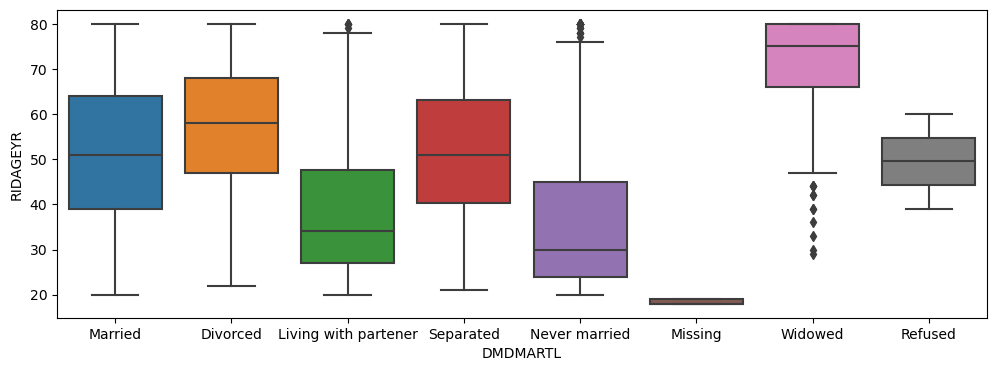

In [165]:
# Distribution des ages selon la situation matrimoniale
plt.figure(figsize=(12,4))
sns.boxplot(x = 'DMDMARTL', y = 'RIDAGEYR', data = df);

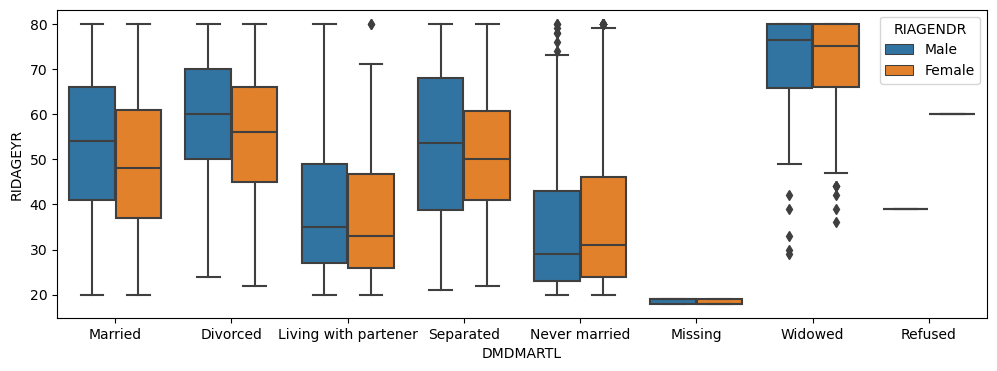

In [163]:
# Distribution des ages selo la situation matrimoniale et le sexe
plt.figure(figsize=(12,4))
sns.boxplot(x = 'DMDMARTL', y = 'RIDAGEYR', hue ='RIAGENDR', data = df);

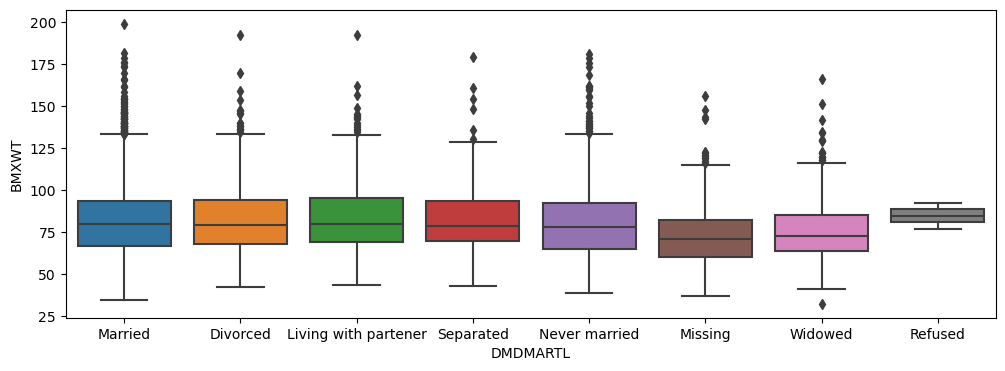

In [167]:
# Distribution du poids en fonction de la situation matrimoniale
plt.figure(figsize=(12,4))
sns.boxplot(x = 'DMDMARTL', y = 'BMXWT', data = df);

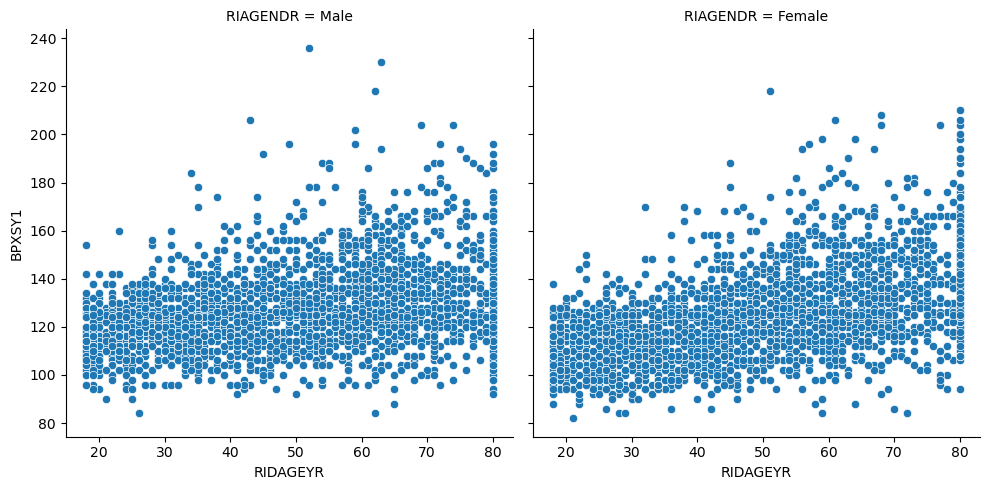

In [173]:
# pression arterielle en fonction de l'age differnciée selon le genre

sns.relplot(x = 'RIDAGEYR', y = 'BPXSY1', col = 'RIAGENDR', kind = 'scatter', data = df);

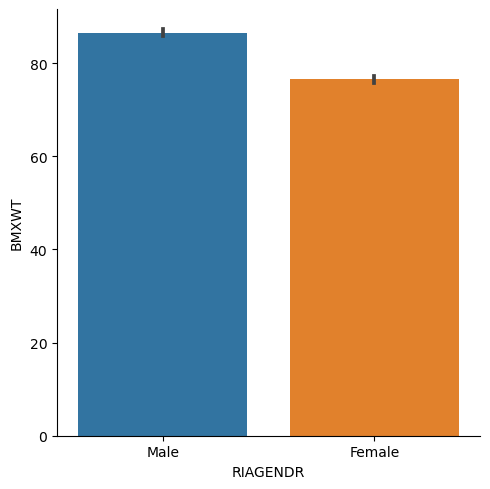

In [175]:
#poids en fonction du genre

sns.catplot( x = 'RIAGENDR', y='BMXWT',kind = 'bar',data = df);

# <center> <font color=yellow> **EXERCICE SUR L'ANALYSE MULTIVARIEE**

# <font color=red> **Objectif**
Dans cet Exercice, votre tache principale consiste à réaliser l'analyse multivariée d'un jeu de données réel. Vous utiliserez un jeu de données résultant de l'enquete nationale sur la santé et la nutrition réaliséepar le centre nationale des statistique sanitaires aux USA. il s'agit d'un programme d'études conçu pour évaluer la santé et l'état nutritionnel des adultes et des enfants aux USA. Les données proviennent de cette sources : 
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/


In [182]:
# importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go 
from plotly.figure_factory import create_table
import plotly.express as px
import scipy.stats as st
from scipy import stats
from PyPDF2 import PdfMerger

In [184]:
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.000000,1.587522,1.000000,1,Male,62,3,1.0,college,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.100000,2.000000
1,83733,1.000000,1.587522,6.000000,1,Male,53,3,2.0,HS/GED,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.900000,1.915469
2,83734,1.000000,1.587522,3.911512,1,Male,78,3,1.0,HS/GED,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.500000,2.000000
3,83735,2.000000,1.000000,1.000000,2,Female,56,3,1.0,college,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.100000,2.000000
4,83736,2.000000,1.000000,1.000000,2,Female,42,4,1.0,some college/AA,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.400000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.000000,2.000000,3.911512,1,Female,76,3,1.0,HS/GED,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.000000,2.000000
5731,93696,2.000000,2.000000,3.911512,2,Male,26,3,1.0,college,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.200000,2.000000
5732,93697,1.000000,1.587522,1.000000,1,Female,80,3,1.0,some college/AA,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,99.567213,2.000000
5733,93700,1.336406,1.587522,3.911512,1,Male,35,3,2.0,<9,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.900000,2.000000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5735 non-null   float64
 2   ALQ110    5735 non-null   float64
 3   ALQ130    5735 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   object 
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5735 non-null   float64
 9   DMDEDUC2  5735 non-null   object 
 10  DMDMARTL  5735 non-null   object 
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5735 non-null   float64
 16  BPXSY1    5735 non-null   float64
 17  BPXDI1    5735 non-null   float64
 18  BPXSY2    5735 non-null   float64
 19  BPXDI2    5735 non-null   float64
 20  BMXWT     5735 non-null   floa

## <font color = red> **QUESTION 1** 
Construire un nuage de points montrant la relation entre les première et deuxièmes mesures de la pression artérielle diastolique
variable BPXDI1 et BPXDI2. De plus,calculez le coef de corrélation de pearson entre ces deux variables et commentez les résultats(graphique et coef de pearson)

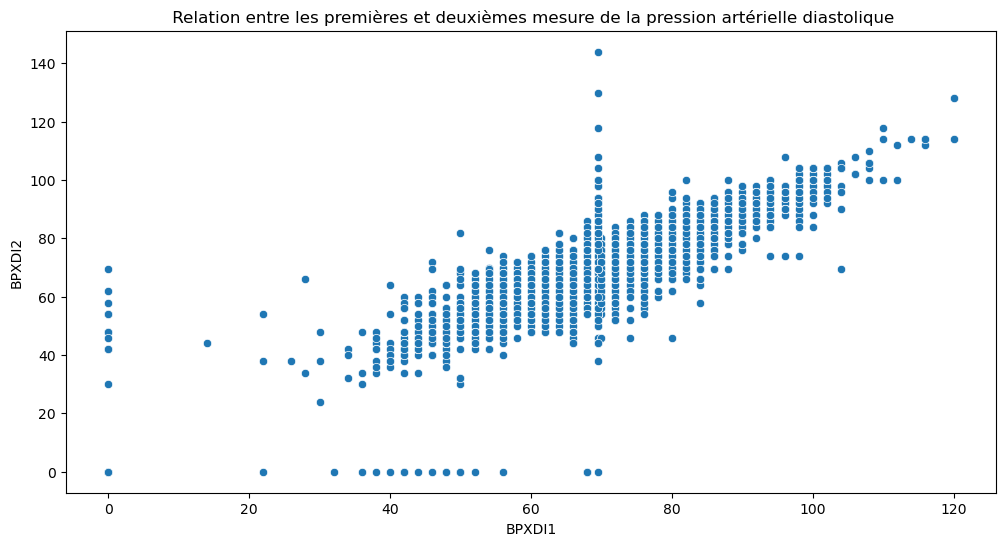

In [200]:
# Nuage de points entre les variables BPXDI1 et BPXDI2
# Relation entre la Variable 'BPXDI1' et 'BPXDI2"   // scatterplot = nuage de point
plt.figure(figsize=(12,6))
sns.scatterplot(x="BPXDI1" , y = 'BPXDI2' , data = df )
plt.title(" Relation entre les premières et deuxièmes mesure de la pression artérielle diastolique")
plt.show()

In [202]:
# Coefficient de corrélation de pearson entre les variables BPXDI1 et BPXDI2
# coefficient de pearson entre les variables // 
# mesure la force de la relation 

stats.pearsonr(df["BPXDI1"],df['BPXDI2'])

# pears =0.85 il y a une forte corrélation entre ces variables,elle est statistiquement significative pcq pvalue = 0.0 < 0.05

PearsonRResult(statistic=0.8570492585453641, pvalue=0.0)

## <font color = red> **QUESTION 2** 

En utilisant la fonction **relplot()** de seaborn , construire une grille de nuage de points entre la première mesure de la pression arterielle diastolique(BDXDI1) et la première mesure de la pression artérielle systolique (BPXSY1) tout en stratifiant les graphiques selon le genre (RIAGENDR)

- Calculez le coef de corrélation de pearson entre ces deux variables pour chaque sexe
- commentez les résultats (graphique et coef de pearson)


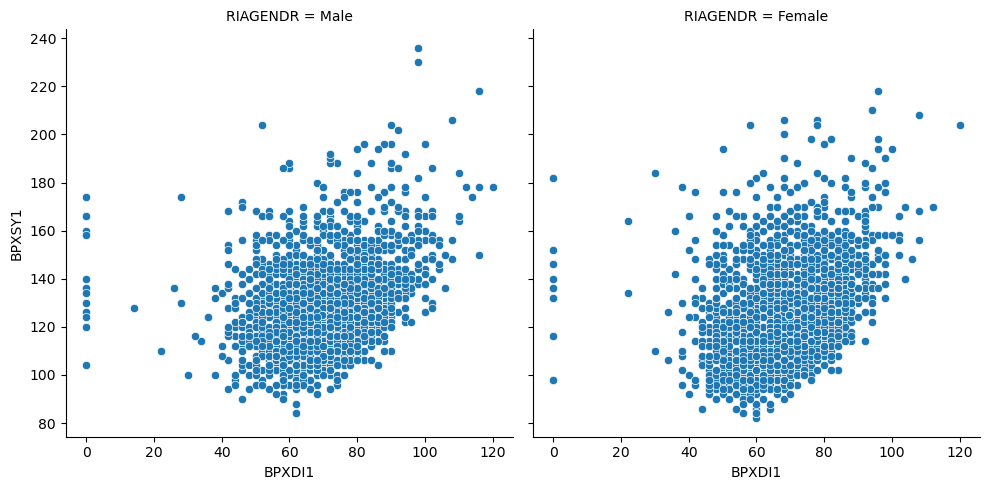

In [209]:
# relation entre 'BPXDI1" et 'BPXSY1" pour chaque sexe

sns.relplot(x ='BPXDI1', y = 'BPXSY1', col = 'RIAGENDR', kind = 'scatter', data = df);

In [211]:
# coef de pearson
print ("Femme : ", stats.pearsonr(df[df.RIAGENDR == 'Female']['BPXDI1'],
                   df[df.RIAGENDR == 'Female']['BPXSY1']))

print ("Homme : ", stats.pearsonr(df[df.RIAGENDR == 'Male']['BPXDI1'],
                   df[df.RIAGENDR == 'Male']['BPXSY1']))

Femme :  PearsonRResult(statistic=0.3163838214647745, pvalue=3.560293839283516e-70)
Homme :  PearsonRResult(statistic=0.3065273388639239, pvalue=4.188072543097871e-61)


## <font color = red> **QUESTION 3** 

utilisez les boites à moustache pour comparer les distributions des ages (variable RIDAGEYR) au sein des groupes définis par le genre et niveau d'éducation atteint (Variable DMDEDUC2)

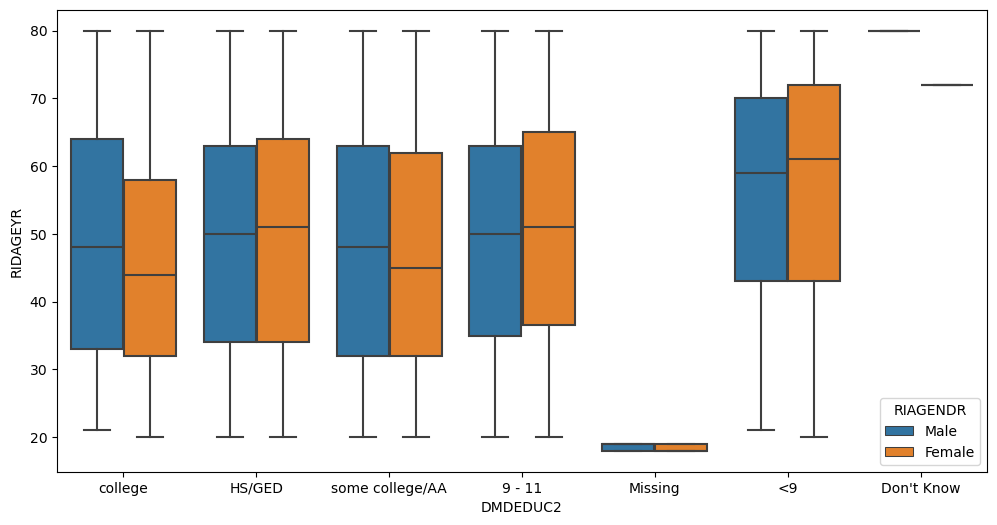

In [221]:
# Distribution des ages selon le genre etle niveau d'éducation
plt.figure(figsize =(12,6))
sns.boxplot( x = "DMDEDUC2" , y = "RIDAGEYR", hue = 'RIAGENDR', data = df);

## <font color = red> **QUESTION 4** 
Construisez un tableau de contigence entre la variable indiquant la situation matrimoniale (DMDMARTL) et celle indiquant si la personne a eu ou non d'assurance maladie au cours des 12 derniers mois (HIQ210). Normalisez les résultats de telle façon que la somme des valeurs dans chaque coloone soit à 1(les colonnes du tableau doivent etre les modalités de la variable indiquant le statut matrimonial) commentez le tableau

In [224]:
# tableau de contingence
pd.crosstab(df.HIQ210,df.DMDMARTL).apply(lambda z: z/z.sum(), axis =0)

DMDMARTL,Divorced,Living with partener,Married,Missing,Never married,Refused,Separated,Widowed
HIQ210,,,,,,,,
1.000000,0.079447,0.119545,0.066906,0.072797,0.110558,0.0,0.069892,0.045455
1.915469,0.145078,0.309298,0.137770,0.249042,0.218127,0.0,0.301075,0.083333
2.000000,0.773748,0.569260,0.794604,0.666667,0.671315,1.0,0.623656,0.871212
9.000000,0.001727,0.001898,0.000719,0.011494,0.000000,0.0,0.005376,0.000000


In [231]:
# recoder les modalités de la variable
df.HIQ210.info()
df.HIQ210 = df.HIQ210.replace({
    1.0 : 'Yes',2.0: 'No',9.0 :"Don't Know", np.nan : 'Missing'})

<class 'pandas.core.series.Series'>
RangeIndex: 5735 entries, 0 to 5734
Series name: HIQ210
Non-Null Count  Dtype  
--------------  -----  
5735 non-null   float64
dtypes: float64(1)
memory usage: 44.9 KB


In [233]:
# tableau de contingence
pd.crosstab(df.HIQ210,df.DMDMARTL).apply(lambda z: z/z.sum(), axis =0)

DMDMARTL,Divorced,Living with partener,Married,Missing,Never married,Refused,Separated,Widowed
HIQ210,,,,,,,,
1.915469146238377,0.145078,0.309298,0.137770,0.249042,0.218127,0.0,0.301075,0.083333
Don't Know,0.001727,0.001898,0.000719,0.011494,0.000000,0.0,0.005376,0.000000
No,0.773748,0.569260,0.794604,0.666667,0.671315,1.0,0.623656,0.871212
Yes,0.079447,0.119545,0.066906,0.072797,0.110558,0.0,0.069892,0.045455


## <font color = red> **QUESTION 5** 
Construisez le meme tableau de contingence enstratifiant les resultats selon le genre

In [238]:
# tableau de contingence entre HIQ210 et DMDMARTL, stratifié selon le genre
pd.crosstab([df. RIAGENDR ,df.HIQ210],df.DMDMARTL).apply(lambda z: z/z.sum(), axis =0)

DMDMARTL                    Divorced  Living with partener   Married  \
RIAGENDR HIQ210                                                        
Female   1.915469146238377  0.075993              0.134725  0.067266   
         Don't Know         0.001727              0.000000  0.000719   
         No                 0.466321              0.294118  0.367626   
         Yes                0.060449              0.068311  0.033094   
Male     1.915469146238377  0.069085              0.174573  0.070504   
         Don't Know         0.000000              0.001898  0.000000   
         No                 0.307427              0.275142  0.426978   
         Yes                0.018998              0.051233  0.033813   

DMDMARTL                     Missing  Never married  Refused  Separated  \
RIAGENDR HIQ210                                                           
Female   1.915469146238377  0.099617       0.091633      0.0   0.155914   
         Don't Know         0.000000       0.000000      0.0   0.005376   
         No                 0.337165       0.363546      0.5   0.408602   
         Yes                0.045977       0.062749      0.0   0.064516   
Male     1.915469146238377  0.149425       0.126494      0.0   0.145161   
         Don't Know         0.011494       0.000000      0.0   0.000000   
         No                 0.329502       0.307769      0.5   0.215054   
         Yes                0.026820       0.047809      0.0   0.005376   

DMDMARTL                     Widowed  
RIAGENDR HIQ210                       
Female   1.915469146238377  0.058081  
         Don't Know         0.000000  
         No                 0.648990  
         Yes                0.040404  
Male     1.915469146238377  0.025253  
         Don't Know         0.000000  
         No                 0.222222  
         Yes                0.005051

In [240]:
df.HIQ210.value_counts()

HIQ210
No                   4268
1.915469146238377    1003
Yes                   456
Don't Know              8
Name: count, dtype: int64